# **Task 1 - Exploration of customer purchasing behavior**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda_analysis import *
from scripts.logger import setup_logger

# Load data

In [36]:
data_sample = pd.read_csv(r'c:\Users\yami\Downloads\rossmann-store-sales\sample_submission.csv')
data_store = pd.read_csv(r'c:\Users\yami\Downloads\rossmann-store-sales\store.csv')
data_test = pd.read_csv(r'c:\Users\yami\Downloads\rossmann-store-sales\test.csv', low_memory=False)
data_train = pd.read_csv(r'c:\Users\yami\Downloads\rossmann-store-sales\train.csv', low_memory=False)


# Logger

In [37]:
logger = setup_logger('eda_logger', '../logs/eda.log')

In [38]:
logger.info('Training, test, and store data loaded.')

# Properties of the Data

In [39]:
data_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [40]:
data_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [41]:
data_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [42]:
data_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [43]:
data_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [44]:
data_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

**1.** Check for distribution in both training and test sets - are the **promotions distributed similarly** between these two groups?

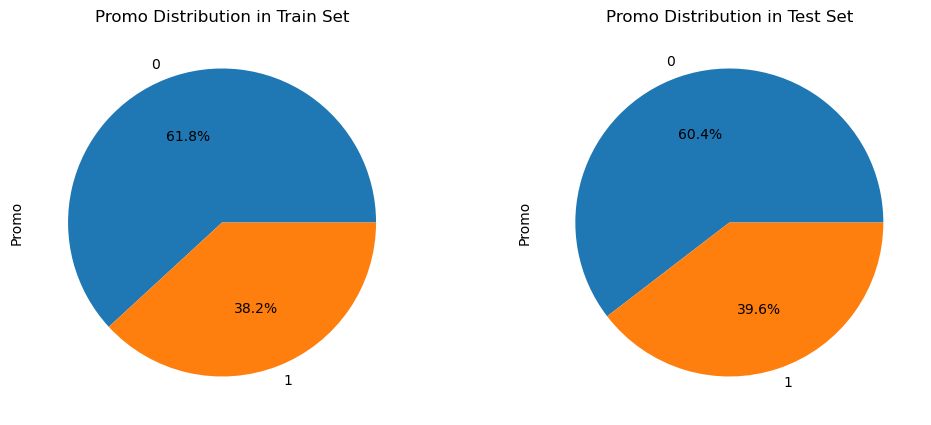

In [45]:
plot_promo_distribution(data_train, data_test)

**2.** Check & compare **sales behavior** before, during, and after holidays

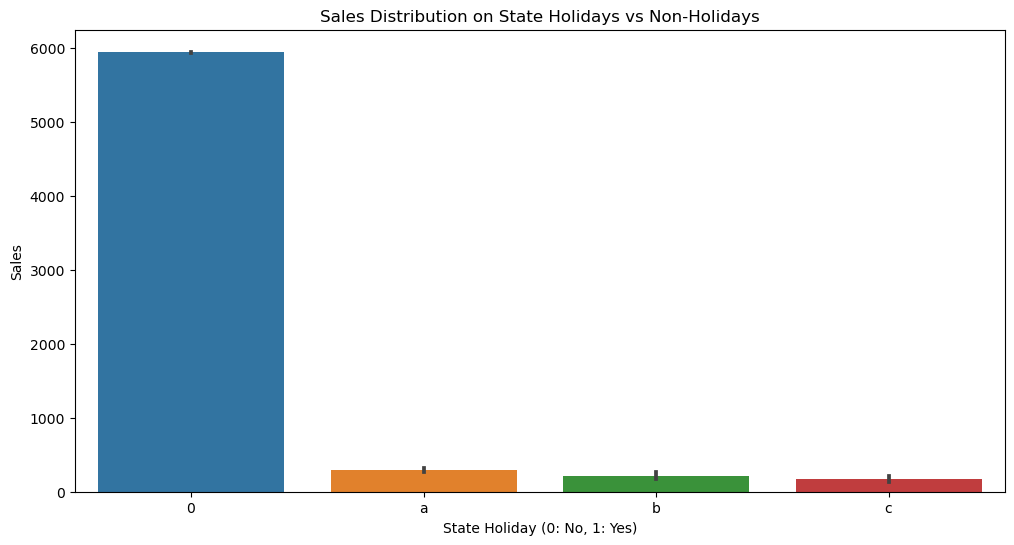

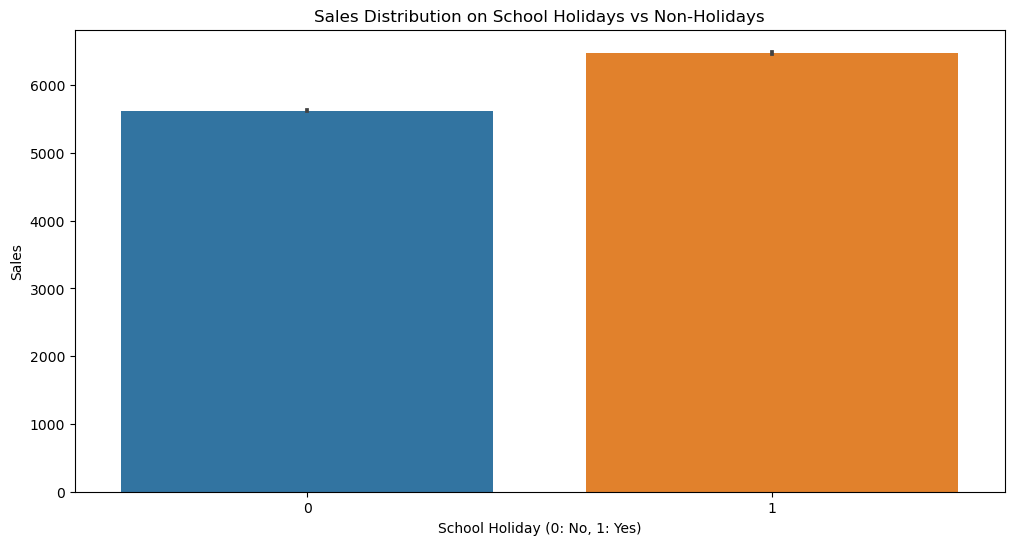

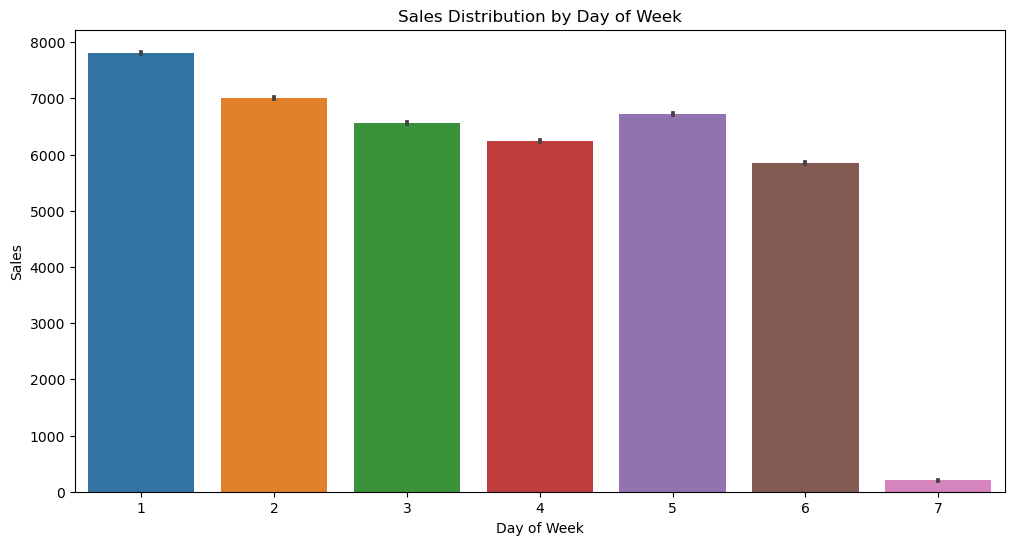

In [46]:
analyze_holiday_sales(data_train)

**3.** Find out any seasonal (Christmas, Easter, etc) purchase behaviors

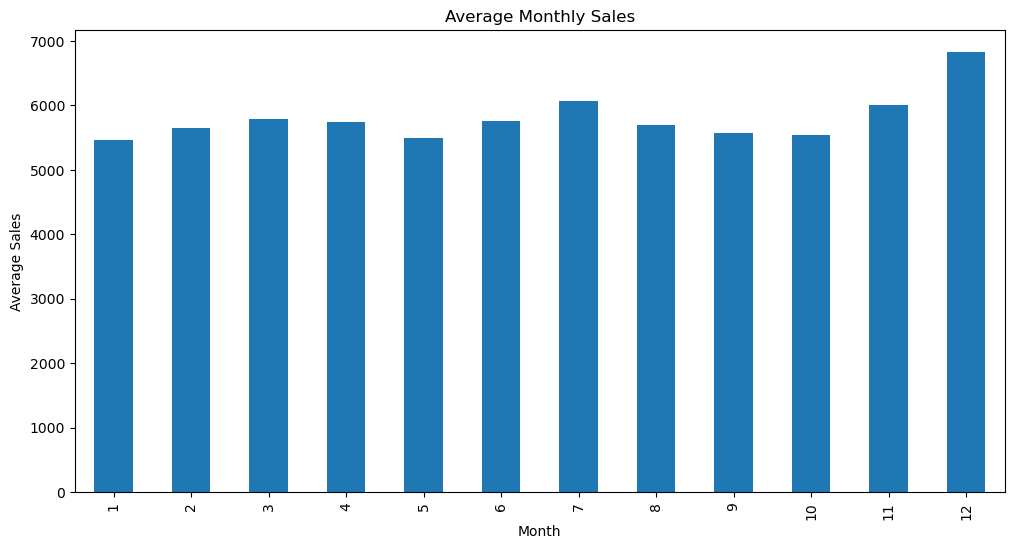

In [47]:
analyze_seasonal_sales(data_train)

**4.** What can you say about the **correlation between sales and the number of customers**?

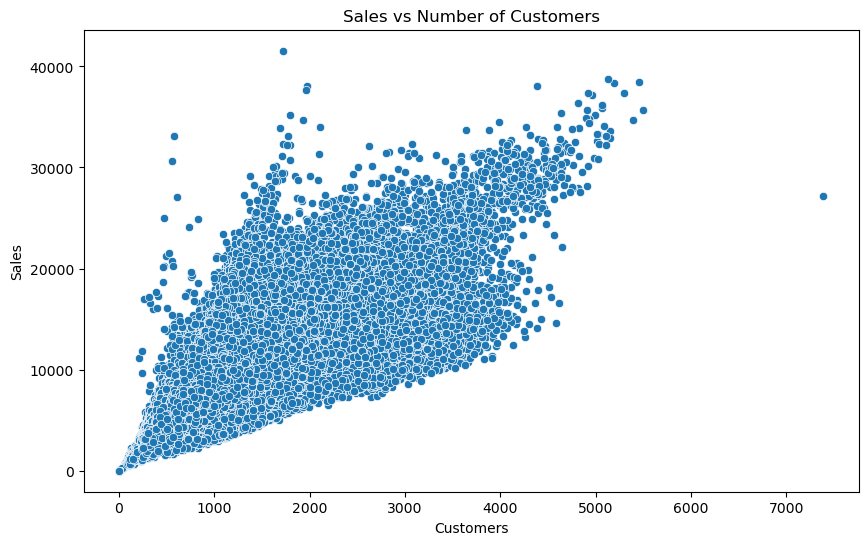

Correlation between Sales and Customers: 0.894710773301698


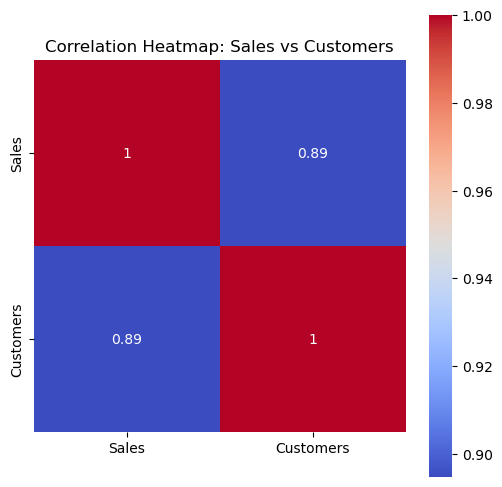

In [48]:
analyze_sales_customers_correlation(data_train)
logger.info("correlation between sales and number of customers")

**5.** How does **promo affect sales**? Are the promos attracting more customers? How does it affect already existing customers?

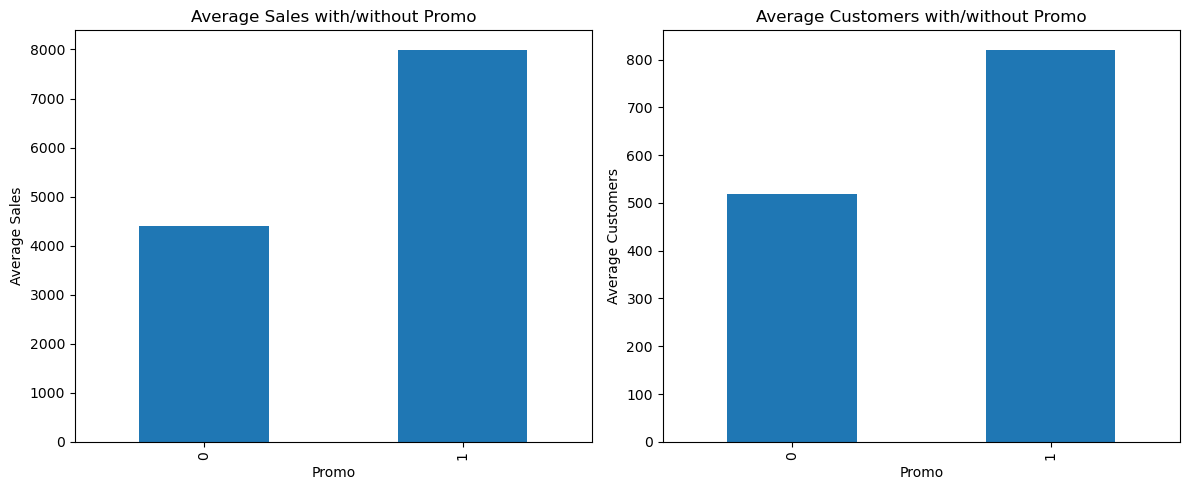

In [49]:
analyze_promo_effect(data_train)

**6.** Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [50]:
print(data_train.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month'],
      dtype='object')


In [53]:
print(data_store.columns)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [54]:
data_train = data_train.merge(data_store, on='Store', how='left')

In [55]:
# Group by StoreType and Promo to calculate average sales
promo_effect_by_store_type = data_train.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack()

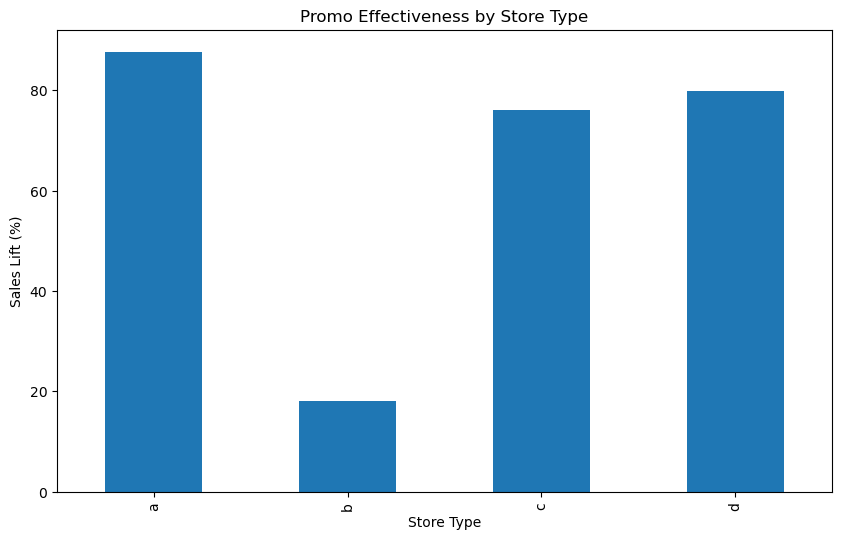

Top 10 stores where promos are most effective:
Store
198     2.258195
607     1.889831
543     1.759064
575     1.737234
271     1.620440
693     1.611931
96      1.575477
1108    1.567058
552     1.562815
635     1.559672
dtype: float64


In [56]:
enhance_promo_analysis(data_train)

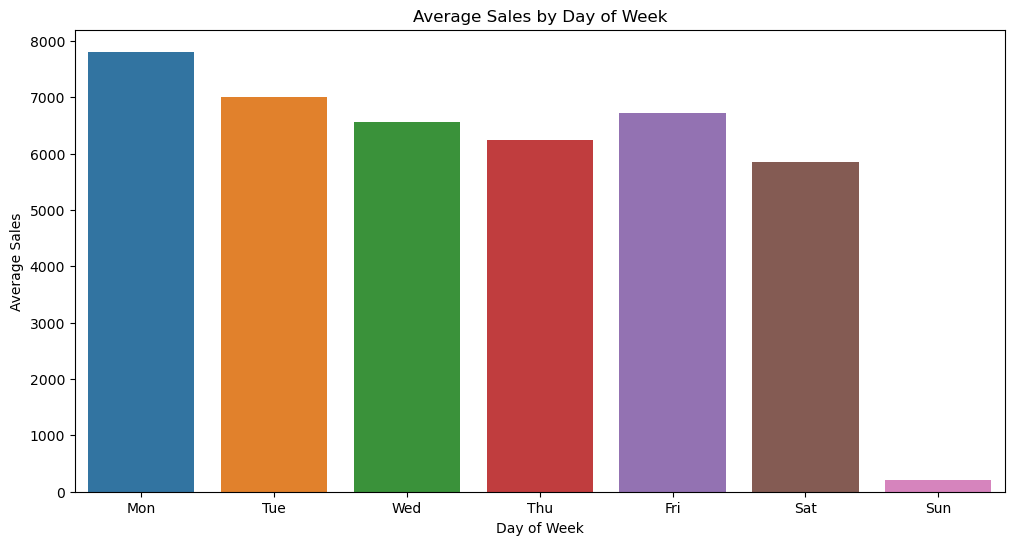

Proportion of stores open by day of week:
DayOfWeek
1    0.950459
2    0.988309
3    0.974400
4    0.923199
5    0.950598
6    0.995357
7    0.024826
Name: Open, dtype: float64

Average sales for open stores by day of week:
DayOfWeek
1    8216.073074
2    7088.113656
3    6728.122978
4    6767.310159
5    7072.677012
6    5874.840238
7    8224.723908
Name: Sales, dtype: float64


In [57]:
analyze_store_hours(data_train)

**7.** Trends of customer behavior during store opening and closing times

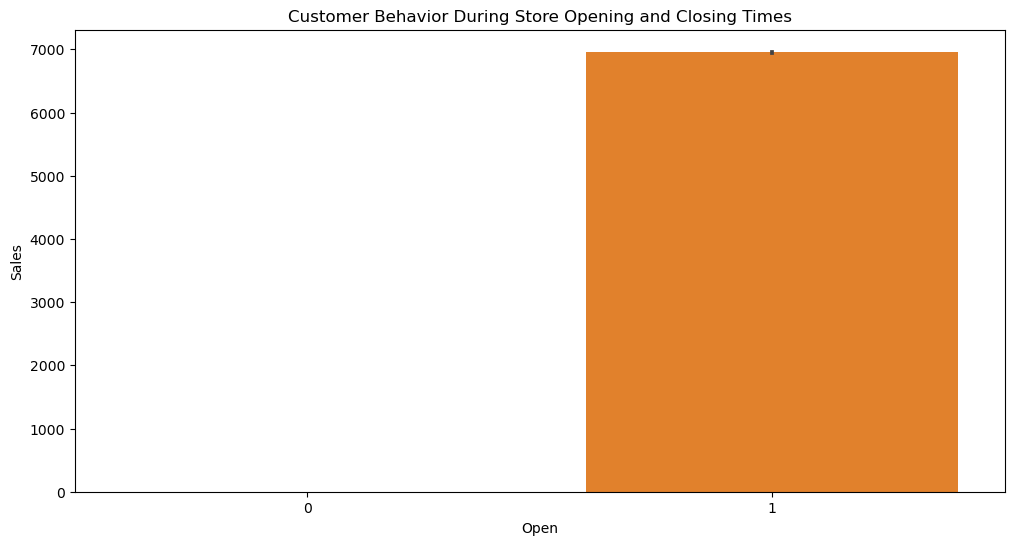

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Open', y='Sales', data=data_train)
plt.title('Customer Behavior During Store Opening and Closing Times')
plt.xlabel('Open')
plt.ylabel('Sales')
plt.show()

**8.** Which stores are open on all weekdays? How does that affect their sales on weekends? 

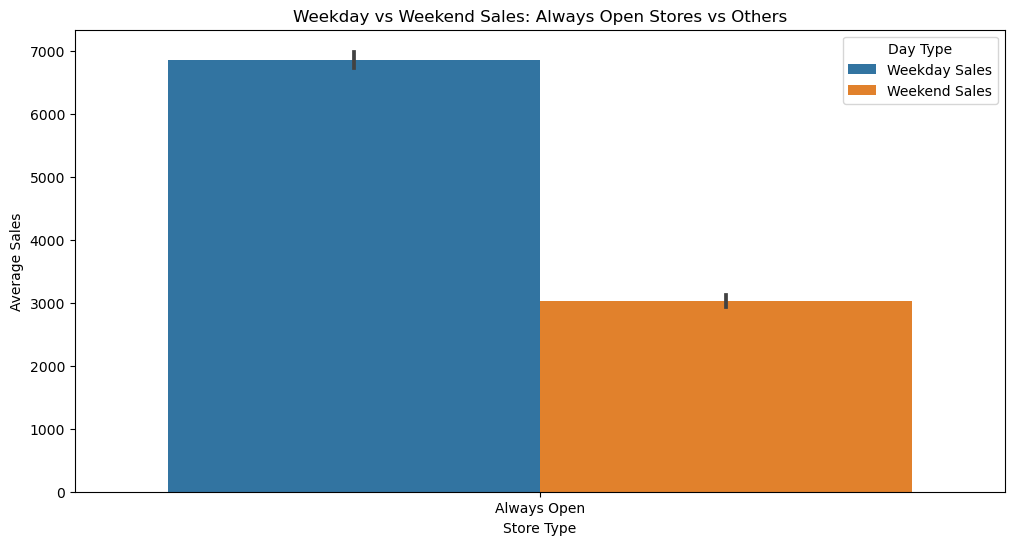

Summary Statistics:
            Weekday Sales              Weekend Sales             
                     mean       median          mean       median
Store Type                                                       
Always Open   6850.073688  6530.900593   3031.040139  2778.347015


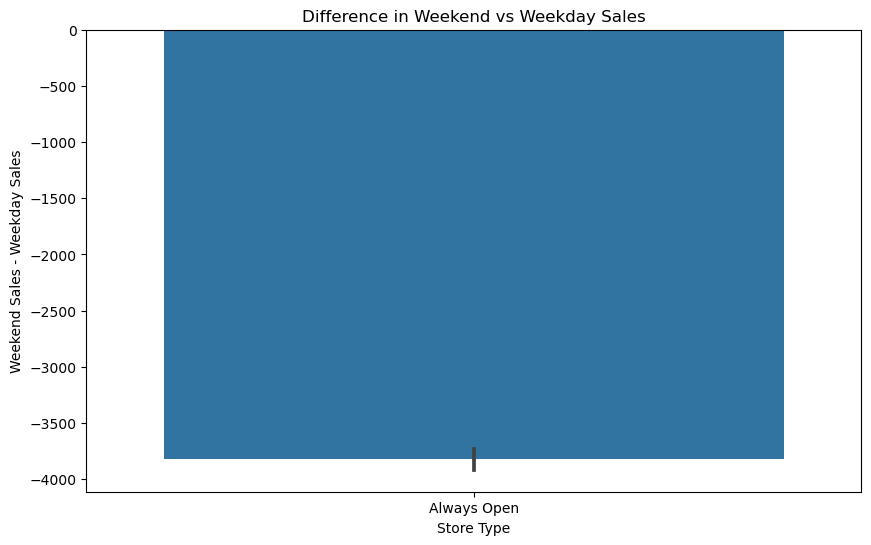


Average difference in Weekend vs Weekday sales:
Store Type
Always Open   -3819.033549
Name: Weekend_Weekday_Diff, dtype: float64


In [59]:
analyze_weekday_open_stores(data_train)

**9.** Check how the assortment type affects sales

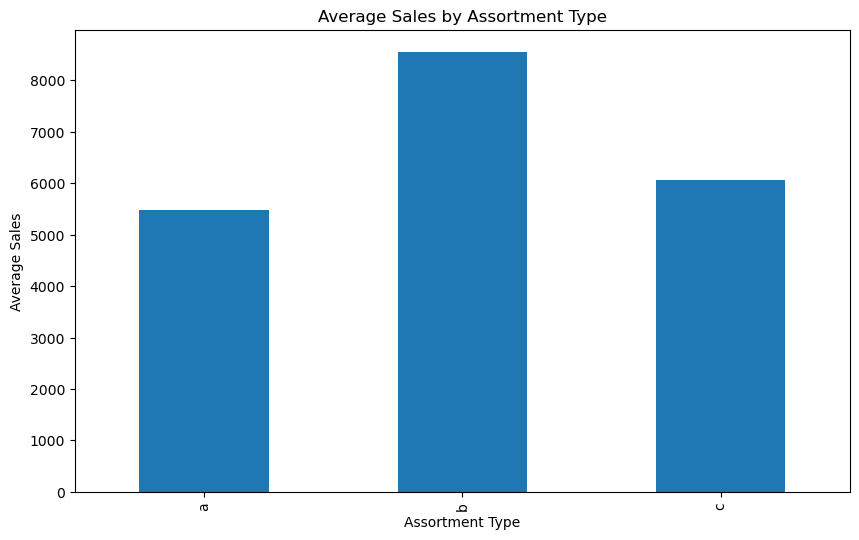

In [60]:
analyze_assortment_effect(data_train)

**10.** How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?

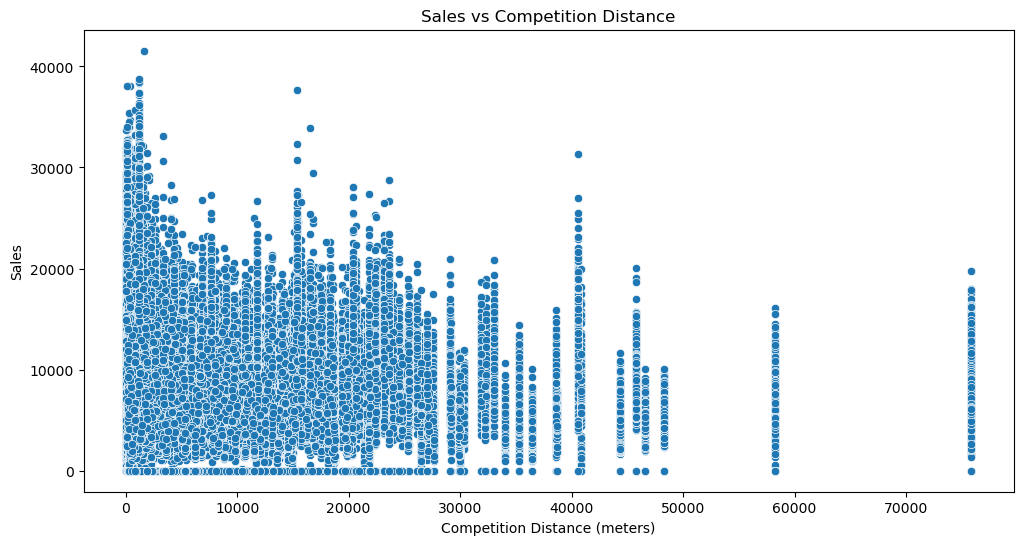

Sales vs Competition Distance (Correlation: -0.02)


In [61]:
analyze_competition_distance(data_train)

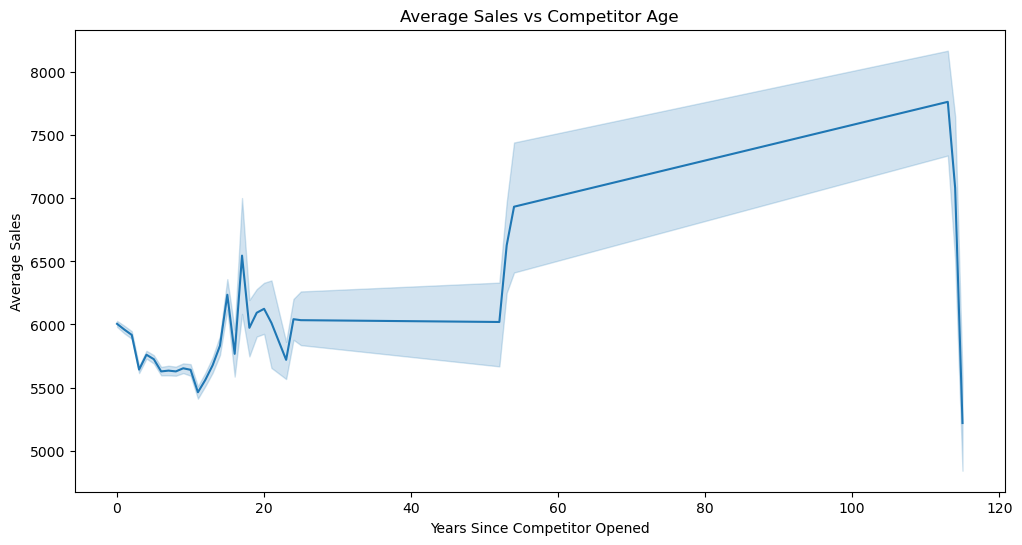

In [62]:
analyze_new_competitors(data_train)

**11.** How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance

Total stores affected by new competitor opening: 0


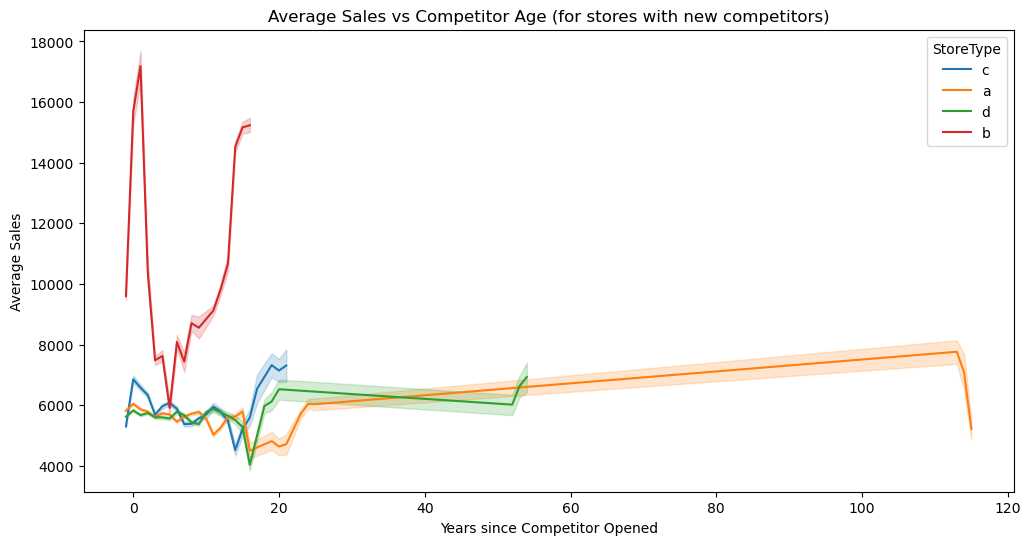

c:\Users\yami\Desktop\KIAM 3\Week 4\Pharmaceuticals sales forecast\scripts\eda_analysis.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  competitor_opening_stores['BeforeCompetitor'] = (data['Date'].dt.year < data['CompetitionOpenSinceYear'])


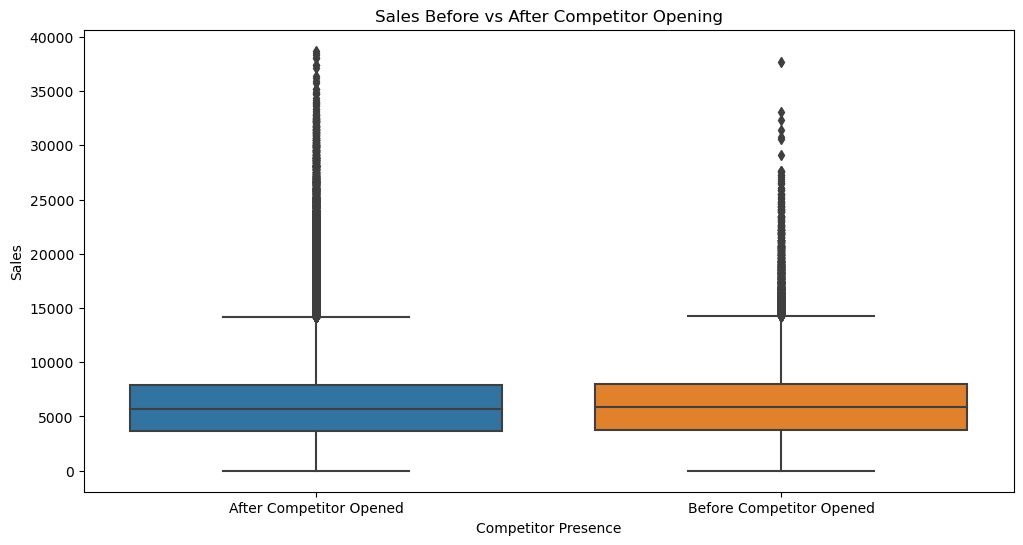

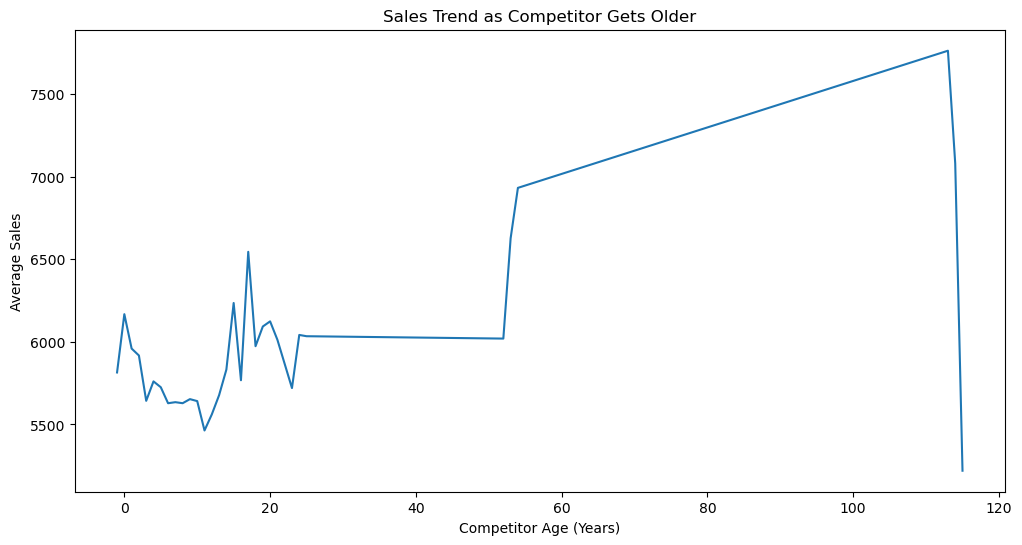

Correlation between Competition Distance and Sales: -0.02


In [63]:
analyze_competitor_effect(data_train)